In [19]:
# %set_env CUDA_VISIBLE_DEVICES=7
# %load_ext cudf.pandas
import pandas as pd

# from eval_vlm.datasets_zoo.registry import list_datasets
from unibench.models_zoo.registry import list_models
from unibench.output import OutputHandler
import seaborn as sns
import matplotlib.pyplot as plt

models = list_models("all")
datasets = ["countbench"]
outputhandler = OutputHandler()
print(pd)

<module 'pandas' from '/data/home/haideraltahan/anaconda3/envs/clip/lib/python3.11/site-packages/pandas/__init__.py'>


In [20]:
outputhandler.load_all_csv(
    model_name=models,
    benchmark_name=datasets,
    use_cols=[
        "model_name",
        "dataset_name",
        "correctness",
    ],
)

In [21]:
results = outputhandler.query(**{"dataset_name": datasets, "model_name": models})

In [22]:
df_mean = results.groupby(["model_name", "dataset_name"]).correctness.mean()
df_sem = results.groupby(["model_name", "dataset_name"]).correctness.sem()

/tmp/ipykernel_1946620/789687742.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


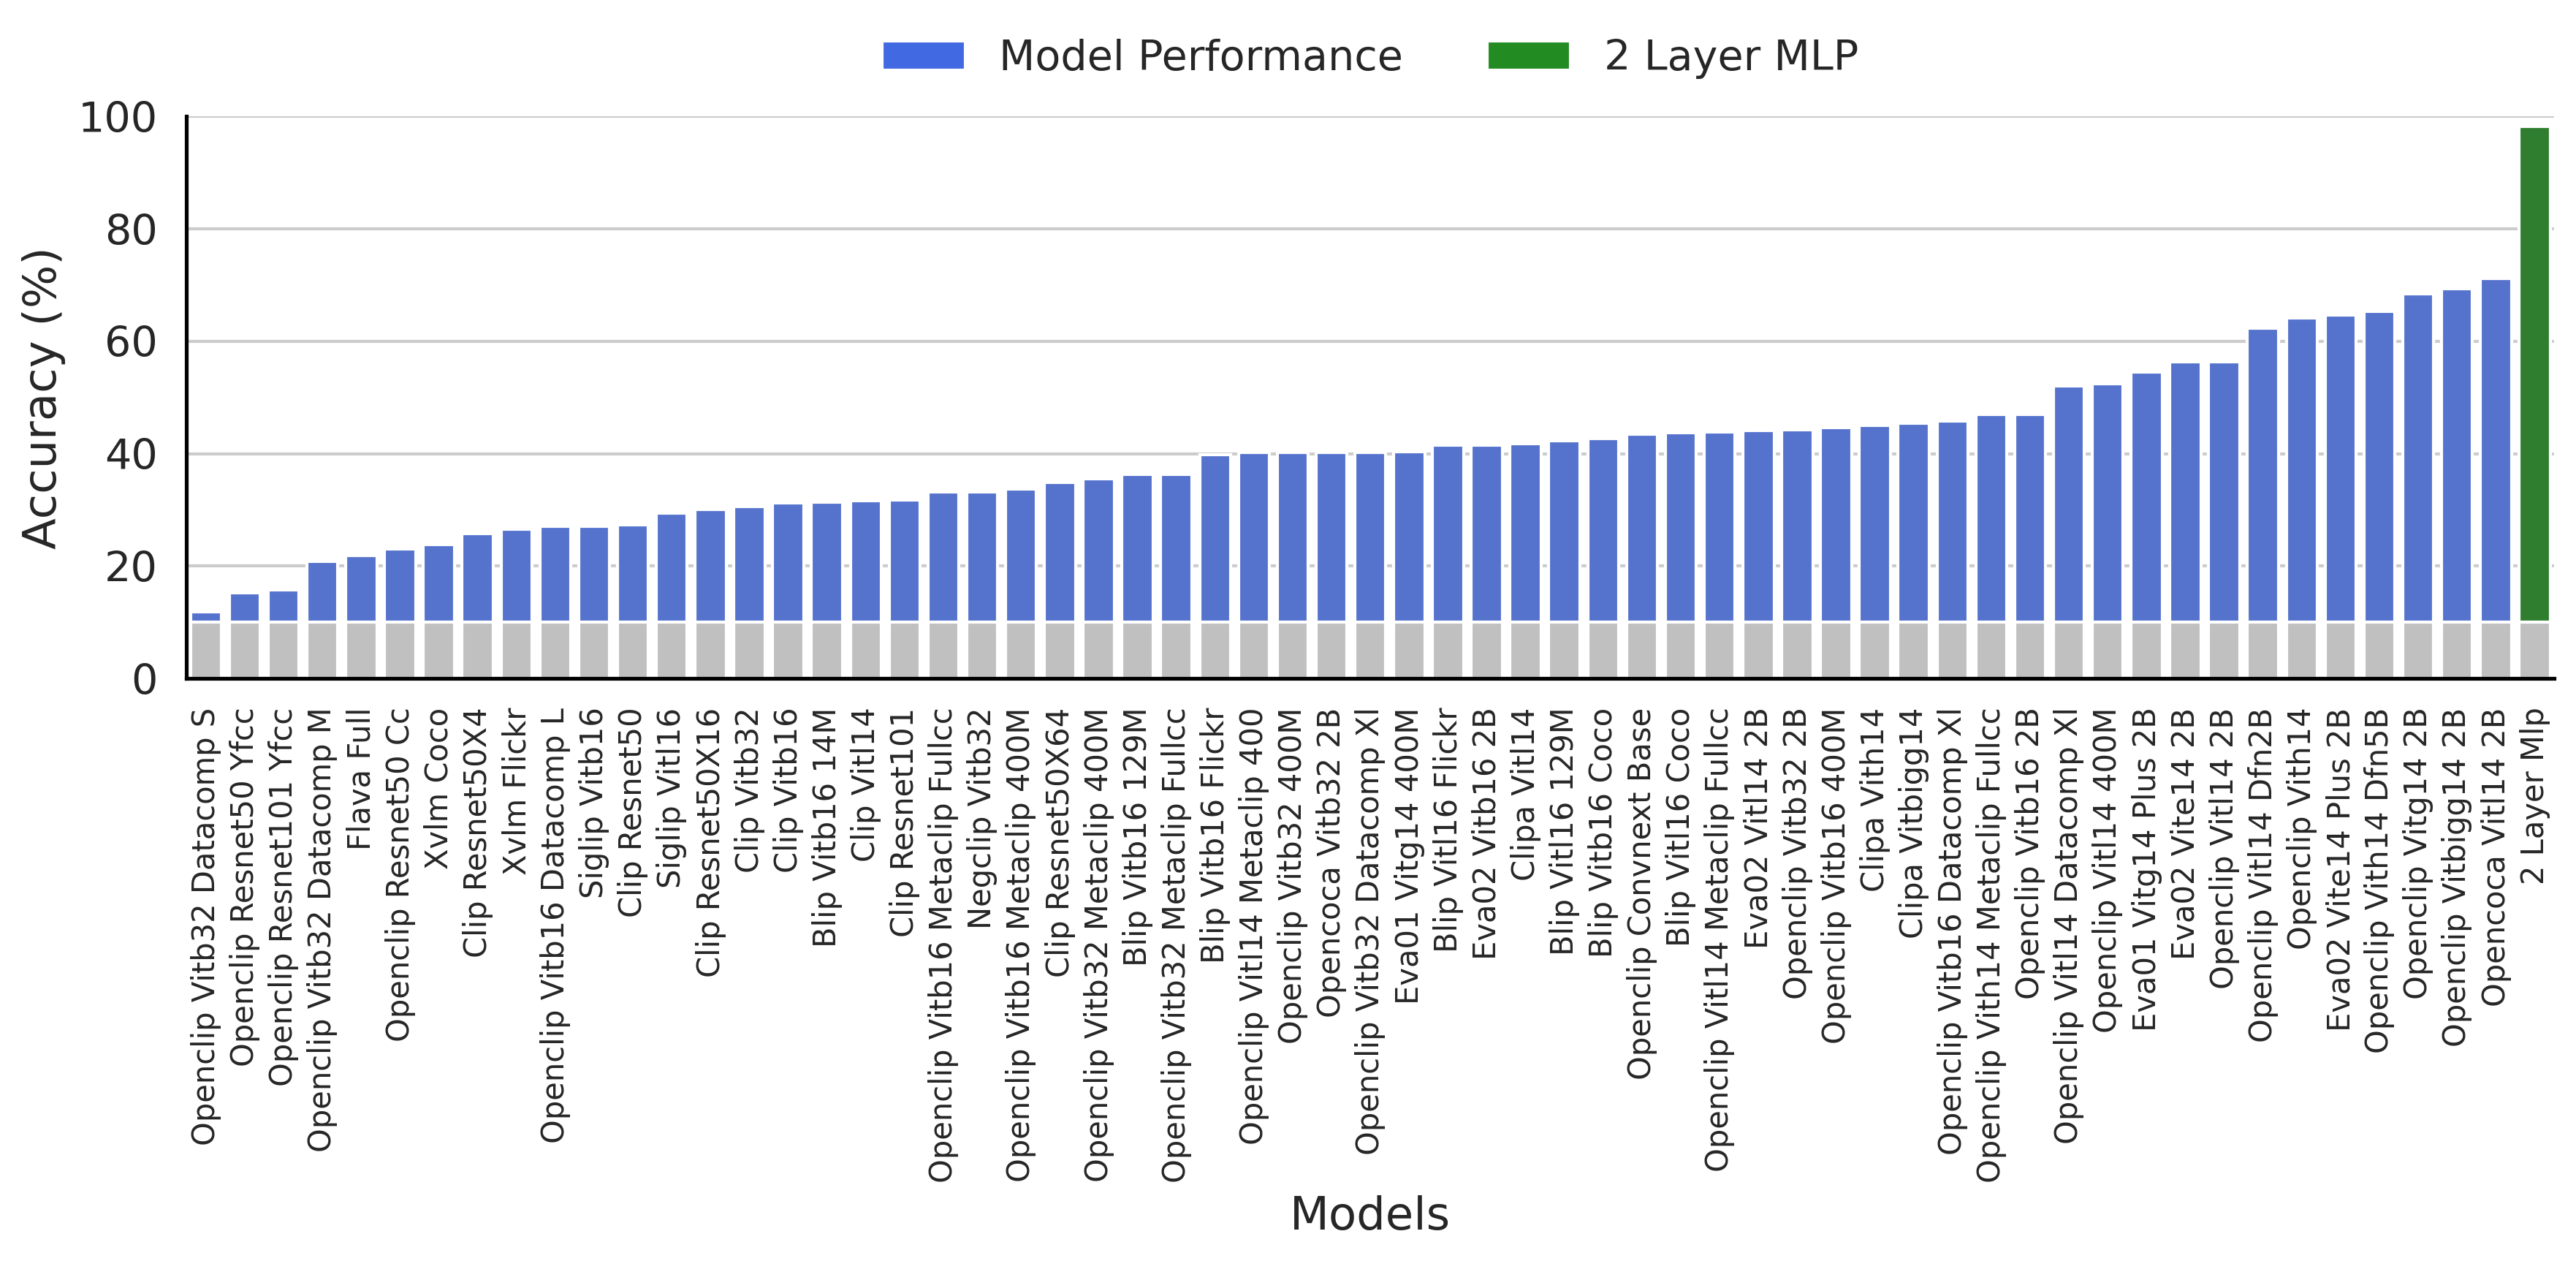

In [23]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 6), dpi=300)

order = list(
    (
        df_mean.reset_index()
        .groupby("model_name")
        .correctness.median()
        .sort_values()
        .index
    )
)
order.append("2 Layer MLP")

m = df_mean.reset_index().groupby("model_name").correctness.mean() * 100
s = df_sem.reset_index().groupby("model_name").correctness.mean() * 100
m["2 Layer MLP"] = 98.26
s["2layer"] = 0

sns.set_style(
    "whitegrid",
    rc={"ytick.left": True, "axes.grid": True},
)


ax1 = sns.barplot(
    x=list(m.keys()),
    y=list(m.values),
    palette=[
        "royalblue" if "2 Layer MLP" not in x else "forestgreen" for x in list(m.keys())
    ],
    errorbar=None,
    order=order,
    ax=axs,
)

axs = sns.barplot(
    x=order,
    y=[10] * len(order),
    errorbar=None,
    order=order,
    ax=axs,
    color="silver",
)

for _, s in ax1.spines.items():
    s.set_color("black")

axs.set_ylim(0, 100)
sns.despine(ax=axs)

from matplotlib.patches import Patch

lgd = plt.legend(
    title=None,
    ncol=3,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    handles=[
        Patch(
            facecolor="royalblue",
            label="Model Performance",
        ),
        Patch(
            facecolor="forestgreen",
            label="2 Layer MLP",
        ),
    ],
    frameon=False,
)

# axs.axhline(y=10, linestyle="--", color="silver")
# axs.text(63, 10, 'Chance', fontsize=10, va='center', ha='center', backgroundcolor='w')
axs.set_xticks(
    [x + 0.4 for x in axs.get_xticks()],
    [x.replace("_", " ").title() for x in order],
    rotation=90,
    ha="right",
)
axs.tick_params(axis="x", which="major", labelsize=10)

axs.set_xlabel("Models")
axs.set_ylabel("Accuracy (%)")
plt.tight_layout()
plt.savefig("pngs/results_summary_mnist.png", dpi=300, bbox_inches="tight")

In [26]:
m.sort_values(ascending=False)

model_name
2 Layer MLP                   98.260000
opencoca_vitL14_2b            71.150097
openclip_vitbigG14_2b         69.395712
openclip_vitG14_2b            68.421053
openclip_vitH14_dfn5b         65.302144
                                ...    
flava_full                    21.832359
openclip_vitB32_datacomp_m    20.857700
openclip_resnet101_yfcc       15.789474
openclip_resnet50_yfcc        15.204678
openclip_vitB32_datacomp_s    11.890838
Name: correctness, Length: 61, dtype: float64